<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Define start day to fetch the dataset from the yahoo finance library

---



In [62]:
df = pd.read_csv("StockHistoricalData/TSLA.csv")
print(df.head())


           Date    Open    High     Low   Close  Adj Close       Volume
0  Nov 26, 2025  423.95  426.94  416.89  426.58     426.58   63,299,400
1  Nov 25, 2025  414.42  420.48  405.95  419.40     419.40   71,915,600
2  Nov 24, 2025  402.17  421.72  401.09  417.78     417.78   96,806,400
3  Nov 21, 2025  402.32  402.80  383.76  391.09     391.09  100,460,600
4  Nov 20, 2025  414.63  428.94  394.74  395.23     395.23  113,548,800


In [63]:
df = df.drop(['Date','Adj Close'], axis = 1)

first = df.iloc[:1]
reversed_rest = df.iloc[1:][::-1].reset_index(drop=True)
df = pd.concat([first, reversed_rest], ignore_index=True)

df['Volume'] = (
    df['Volume']
        .astype(str)
        .str.replace(',', '', regex=False)
)

df = df[df['Volume'] != 'nan']
df['Volume'] = df['Volume'].astype(int)

df.head()

,Open,High,Low,Close,Volume
0,423.95,426.94,416.89,426.58,63299400
1,193.72,199.59,192.82,195.25,112683300
2,200.74,202.60,184.84,189.20,189009300
3,199.2,199.28,190.68,194.92,120310500
4,185.48,190.51,180.40,189.61,143327100


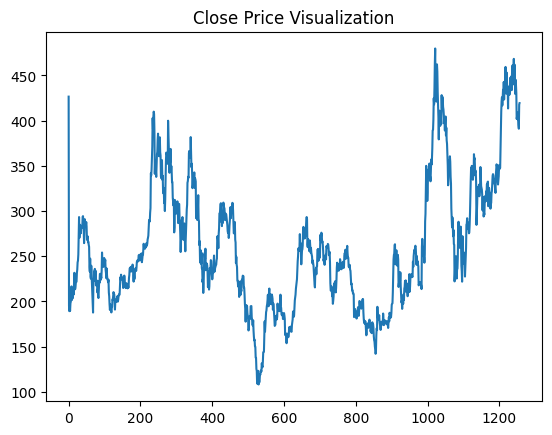

In [64]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

# Plotting moving averages of 100 day

---



Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

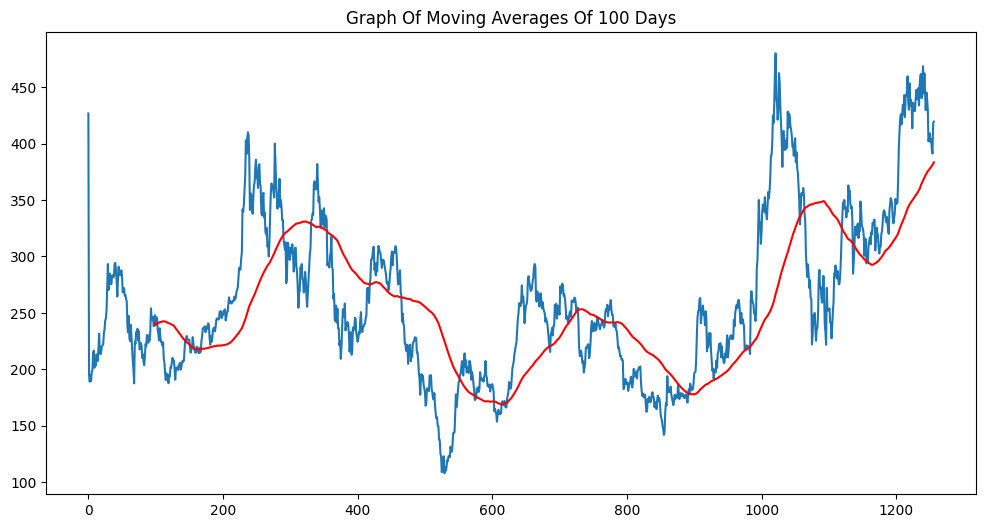

In [65]:
ma100 = df.Close.rolling(100).mean()
ma100

plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Spliting the dataset into training (80%) and testing (20%) set

In [66]:
# Splitting data into training and testing

train = pd.DataFrame(df[0:int(len(df)*0.80)])
test = pd.DataFrame(df[int(len(df)*0.80): int(len(df))])

print(train.shape)
print(test.shape)

(1004, 5)
(252, 5)


In [67]:
train.head()

,Open,High,Low,Close,Volume
0,423.95,426.94,416.89,426.58,63299400
1,193.72,199.59,192.82,195.25,112683300
2,200.74,202.60,184.84,189.20,189009300
3,199.2,199.28,190.68,194.92,120310500
4,185.48,190.51,180.40,189.61,143327100


In [68]:
test.head()

,Open,High,Low,Close,Volume
1005,341.09,361.53,337.70,352.56,89140700
1006,360.14,361.93,338.20,338.59,95890900
1007,341,346.96,335.66,338.23,62295900
1008,341.8,342.55,326.59,332.89,57896400
1009,336.08,345.45,334.65,345.16,37167600


# Using MinMax scaler for normalization of the dataset

---



In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

train_close = train.iloc[:, 3:4].values
test_close = test.iloc[:, 3:4].values

train_close

array([[426.58],
       [195.25],
       [189.2 ],
       ...,
       [346.  ],
       [342.03],
       [339.64]], shape=(1004, 1))

In [70]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[1.        ],
       [0.27364356],
       [0.25464707],
       ...,
       [0.74698568],
       [0.73452022],
       [0.72701583]], shape=(1004, 1))

In [71]:
data_testing_array = scaler.transform(test_close)
data_testing_array

array([[0.76758352],
       [0.72371891],
       [0.72258855],
       [0.7058214 ],
       [0.74434815],
       [0.78180733],
       [0.76400402],
       [0.78444486],
       [0.82074228],
       [0.88269279],
       [0.88448254],
       [0.91964959],
       [0.99431675],
       [0.97337352],
       [1.03030018],
       [1.11441849],
       [1.16729465],
       [1.04254584],
       [1.03011178],
       [0.98266767],
       [1.01262246],
       [1.11209495],
       [1.08650465],
       [1.01595077],
       [0.97120698],
       [0.92859834],
       [0.85148204],
       [0.94932178],
       [0.95123713],
       [0.89883195],
       [0.9006531 ],
       [0.90002512],
       [0.92693419],
       [0.90511178],
       [1.00514946],
       [0.95993469],
       [0.99974881],
       [0.99211881],
       [0.96398518],
       [0.95541321],
       [0.93720171],
       [0.90759231],
       [0.91054383],
       [0.882316  ],
       [0.91742025],
       [0.93098468],
       [0.86529766],
       [0.892

In [72]:
x_train = []
y_train = [] 


for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [73]:
x_train

array([[[1.        ],
        [0.27364356],
        [0.25464707],
        ...,
        [0.40853429],
        [0.41308716],
        [0.43939965]],

       [[0.27364356],
        [0.25464707],
        [0.27260739],
        ...,
        [0.41308716],
        [0.43939965],
        [0.41384074]],

       [[0.25464707],
        [0.27260739],
        [0.25593444],
        ...,
        [0.43939965],
        [0.41384074],
        [0.42398267]],

       ...,

       [[0.28190153],
        [0.31951771],
        [0.38671188],
        ...,
        [0.63765386],
        [0.66760864],
        [0.7241899 ]],

       [[0.31951771],
        [0.38671188],
        [0.43421879],
        ...,
        [0.66760864],
        [0.7241899 ],
        [0.74698568]],

       [[0.38671188],
        [0.43421879],
        [0.45032655],
        ...,
        [0.7241899 ],
        [0.74698568],
        [0.73452022]]], shape=(904, 100, 1))

In [74]:
x_test = []
y_test = [] 

for i in range(100, data_testing_array.shape[0]):
    x_test.append(data_testing_array[i-100: i])
    y_test.append(data_testing_array[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test) 

In [75]:
x_test.shape

(152, 100, 1)

# ML Model (LSTM)

---



In [76]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.summary()

/opt/homebrew/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [77]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 20)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - MAE: 0.1775 - loss: 0.0540 - val_MAE: 0.2916 - val_loss: 0.0994
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - MAE: 0.1133 - loss: 0.0216 - val_MAE: 0.1107 - val_loss: 0.0200
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - MAE: 0.0999 - loss: 0.0167 - val_MAE: 0.1065 - val_loss: 0.0195
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - MAE: 0.0930 - loss: 0.0150 - val_MAE: 0.1859 - val_loss: 0.0434
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - MAE: 0.0912 - loss: 0.0145 - val_MAE: 0.1348 - val_loss: 0.0254
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - MAE: 0.0859 - loss: 0.0129 - val_MAE: 0.1848 - val_loss: 0.0413
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - MAE: 0.0836 - loss: 0.0120 - val_MAE: 0.1389 - val_loss: 0.0255
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - MAE: 0.0793 - loss: 0.0111 - val_MAE: 0.0915 - val_loss: 0.0127
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - MAE: 0.07

In [78]:
model.save('keras_model.h5')

In [79]:
test_close.shape
test_close

array([[352.56],
       [338.59],
       [338.23],
       [332.89],
       [345.16],
       [357.09],
       [351.42],
       [357.93],
       [369.49],
       [389.22],
       [389.79],
       [400.99],
       [424.77],
       [418.1 ],
       [436.23],
       [463.02],
       [479.86],
       [440.13],
       [436.17],
       [421.06],
       [430.6 ],
       [462.28],
       [454.13],
       [431.66],
       [417.41],
       [403.84],
       [379.28],
       [410.44],
       [411.05],
       [394.36],
       [394.94],
       [394.74],
       [403.31],
       [396.36],
       [428.22],
       [413.82],
       [426.5 ],
       [424.07],
       [415.11],
       [412.38],
       [406.58],
       [397.15],
       [398.09],
       [389.1 ],
       [400.28],
       [404.6 ],
       [383.68],
       [392.21],
       [378.17],
       [374.32],
       [361.62],
       [350.73],
       [328.5 ],
       [336.51],
       [355.94],
       [355.84],
       [354.11],
       [360.56],
       [354.4 

In [80]:
past_100_days = pd.DataFrame(train_close[-100:])

In [81]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [82]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [83]:
final_df.head()

,0
0,246.39
1,251.52
2,252.94
3,262.33
4,263.26


In [84]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.18962166],
       [0.20742798],
       [0.21235682],
       [0.24494967],
       [0.24817772],
       [0.17101701],
       [0.19600833],
       [0.21131552],
       [0.2249219 ],
       [0.19694551],
       [0.19947935],
       [0.16466505],
       [0.20739327],
       [0.18958695],
       [0.08410274],
       [0.09888927],
       [0.09732732],
       [0.14002083],
       [0.10711558],
       [0.1399167 ],
       [0.08712253],
       [0.05522388],
       [0.02471364],
       [0.03082263],
       [0.        ],
       [0.0245748 ],
       [0.02860118],
       [0.01988893],
       [0.05577924],
       [0.03339118],
       [0.07768136],
       [0.08455397],
       [0.10746269],
       [0.10183964],
       [0.10937175],
       [0.06560222],
       [0.09913225],
       [0.07445331],
       [0.06056925],
       [0.04855953],
       [0.05039917],
       [0.07757723],
       [0.06539396],
       [0.09597362],
       [0.13332176],
       [0.06584519],
       [0.08507463],
       [0.119

In [85]:
input_data.shape

(352, 1)

# Testing the model

---



In [86]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [87]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(252, 100, 1)
(252,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [88]:
# Making predictions

y_pred = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [89]:
y_pred.shape

(252, 1)

In [90]:
y_test

array([0.55813953, 0.50964943, 0.50839986, 0.48986463, 0.53245401,
       0.57386324, 0.55418258, 0.5767789 , 0.61690385, 0.68538702,
       0.6873655 , 0.72624089, 0.80878167, 0.78562999, 0.84855953,
       0.94154807, 1.        , 0.86209649, 0.84835127, 0.7959042 ,
       0.8290177 , 0.93897952, 0.91069073, 0.83269698, 0.78323499,
       0.73613329, 0.65088511, 0.759042  , 0.76115932, 0.70322805,
       0.70524124, 0.70454703, 0.73429365, 0.71017008, 0.82075668,
       0.77077404, 0.81478653, 0.80635196, 0.77525165, 0.76577577,
       0.74564387, 0.71291218, 0.71617494, 0.6849705 , 0.72377647,
       0.73877126, 0.66615758, 0.69576536, 0.64703228, 0.63366886,
       0.58958695, 0.55178757, 0.47462687, 0.50242971, 0.56987157,
       0.56952447, 0.56351961, 0.58590767, 0.56452621, 0.50690732,
       0.48167303, 0.38542173, 0.34376952, 0.31305102, 0.35133634,
       0.32242277, 0.27865325, 0.30315863, 0.24883721, 0.24612982,
       0.10548421, 0.13474488, 0.19552239, 0.16980215, 0.20208

In [91]:
y_pred

array([[0.5088698 ],
       [0.5163361 ],
       [0.52119315],
       [0.5230524 ],
       [0.5214175 ],
       [0.51787555],
       [0.5153139 ],
       [0.5149723 ],
       [0.51774   ],
       [0.52479863],
       [0.5383437 ],
       [0.55846566],
       [0.58454084],
       [0.6171373 ],
       [0.65354854],
       [0.6920902 ],
       [0.7334089 ],
       [0.77812797],
       [0.8176417 ],
       [0.8445216 ],
       [0.8537169 ],
       [0.8474176 ],
       [0.83541495],
       [0.82355607],
       [0.81153554],
       [0.7970378 ],
       [0.77794576],
       [0.7521468 ],
       [0.72473884],
       [0.7005947 ],
       [0.68098664],
       [0.66646093],
       [0.6570199 ],
       [0.6533597 ],
       [0.65442866],
       [0.6628999 ],
       [0.6773992 ],
       [0.6968724 ],
       [0.71872735],
       [0.73871505],
       [0.753372  ],
       [0.7603976 ],
       [0.75849247],
       [0.74895555],
       [0.7333316 ],
       [0.71557945],
       [0.6995991 ],
       [0.685

In [92]:
scaler.scale_

array([0.00347102])

In [93]:
scale_factor = 1/scaler.scale_[0]
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

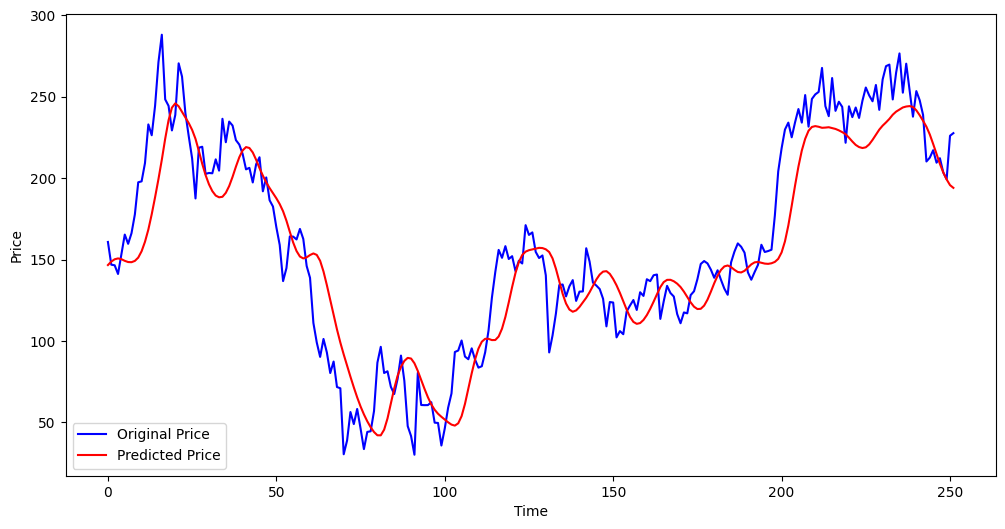

In [94]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [95]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  19.88201350041916
